<a href="https://colab.research.google.com/github/M4deN/Mineracao-Dados/blob/main/Aula_03_Classificacao_Regras_KNN_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina de Minração de Dados
## Programa de Pós-graduação em Informática (PPGI)

# Encontro 3: Regras de Classificação, KNN e Naive Bayes

**Objetivos:**
- Compreender o conceito de classificação e suas métricas de avaliação.
- Aprender sobre classificadores baseados em regras.
- Implementar e avaliar o classificador K-Nearest Neighbors (KNN).
- Implementar e avaliar o classificador Naive Bayes.

## Setup Inicial

Importar as bibliotecas necessárias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Módulos do Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB # MultinomialNB é mais para texto/contagens
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import load_iris, load_breast_cancer # Datasets de exemplo

# Configurações para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Introdução à Classificação e Métricas de Avaliação

Classificação é uma tarefa de aprendizado supervisionado onde o objetivo é prever um rótulo de classe categórico para uma dada instância de entrada. Antes de construir modelos, é crucial entender como avaliá-los.

### 1.1 Carregando um Dataset de Exemplo

Vamos usar o dataset `load_breast_cancer` do Scikit-learn, que é um problema de classificação binária (maligno ou benigno).

In [ ]:
# Carregar o dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target) # 0 para maligno, 1 para benigno

print("Primeiras 5 linhas dos atributos (X):")
print(X.head())
print(f"\nShape de X: {X.shape}")

print("\nPrimeiras 5 linhas do alvo (y):")
print(y.head())
print(f"Distribuição das classes:\n{y.value_counts()}")

Primeiras 5 linhas dos atributos (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst te

### 1.2 Divisão dos Dados em Treino e Teste

É fundamental dividir os dados para treinar o modelo em um conjunto e avaliá-lo em um conjunto não visto.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape de X_train: {X_train.shape}, Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}, Shape de y_test: {y_test.shape}")

Shape de X_train: (455, 30), Shape de X_test: (114, 30)
Shape de y_train: (455,), Shape de y_test: (114,)


### 1.3 Pré-processamento: Padronização dos Atributos

Algoritmos como KNN são sensíveis à escala dos atributos. Vamos padronizá-los.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Usar o mesmo scaler treinado nos dados de treino

# Converter de volta para DataFrame para facilitar a visualização (opcional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Primeiras linhas de X_train_scaled_df:")
print(X_train_scaled_df.head())

Primeiras linhas de X_train_scaled_df:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -1.072001     -0.658425       -1.088080  -0.939274        -0.135940   
1     1.748743      0.066502        1.751157   1.745559         1.274468   
2    -0.974734     -0.931124       -0.997709  -0.867589        -0.613515   
3    -0.145103     -1.215186       -0.123013  -0.253192         0.664482   
4    -0.771617     -0.081211       -0.803700  -0.732927        -0.672282   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0         -1.008718       -0.968359            -1.102032       0.281062   
1          0.842288        1.519852             1.994664      -0.293045   
2         -1.138154       -1.092292            -1.243358       0.434395   
3          0.286762       -0.129729            -0.098605       0.555635   
4         -1.006099       -0.798502            -0.684484       0.737495   

   mean fractal dimension  ...  worst radius  worst t

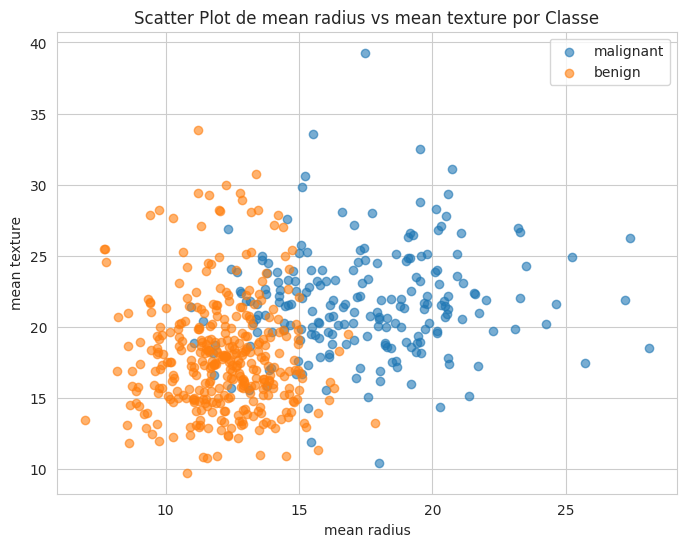

In [ ]:
# prompt: crie um scatter plot com duas colunas do dataset, apontando de qual classe é cada pontos 2D

# Escolha duas colunas para o scatter plot
col1 = 'mean radius'
col2 = 'mean texture'

plt.figure(figsize=(8, 6))
# Scatter plot para a classe 0 (maligno)
plt.scatter(X[y == 0][col1], X[y == 0][col2], label=cancer.target_names[0], alpha=0.6)
# Scatter plot para a classe 1 (benigno)
plt.scatter(X[y == 1][col1], X[y == 1][col2], label=cancer.target_names[1], alpha=0.6)

plt.xlabel(col1)
plt.ylabel(col2)
plt.title(f'Scatter Plot de {col1} vs {col2} por Classe')
plt.legend()
plt.grid(True)
plt.show()

### 1.4 Métricas de Avaliação (Demonstração com um Modelo Simples)

Vamos treinar um KNN simples para demonstrar as métricas.

Acurácia: 0.9561

Matriz de Confusão:
[[39  3]
 [ 2 70]]


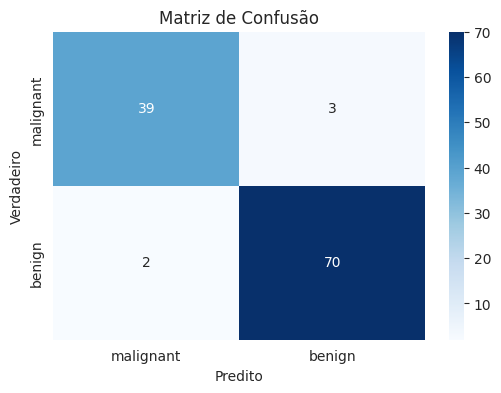


Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



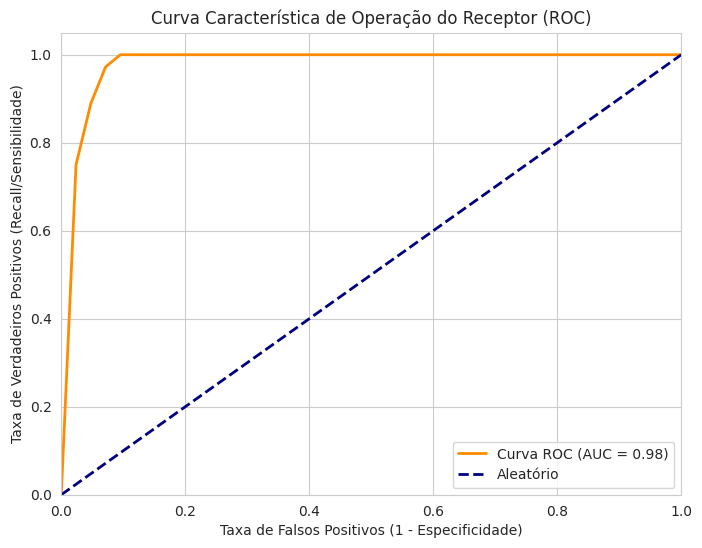

In [ ]:
# Modelo KNN para demonstração de métricas
knn_demo = KNeighborsClassifier(n_neighbors=5)
knn_demo.fit(X_train_scaled, y_train)
y_pred_demo = knn_demo.predict(X_test_scaled)
y_proba_demo = knn_demo.predict_proba(X_test_scaled)[:, 1] # Probabilidade da classe positiva (1)

# Acurácia
acc = accuracy_score(y_test, y_pred_demo)
print(f"Acurácia: {acc:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_demo)
print(f"\nMatriz de Confusão:\n{cm}")

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação (Precisão, Recall, F1-score)
print(f"\nRelatório de Classificação:\n{classification_report(y_test, y_pred_demo, target_names=cancer.target_names)}")

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_demo)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall/Sensibilidade)')
plt.title('Curva Característica de Operação do Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

## 2. Classificação Baseada em Regras (Conceitual)

Classificadores baseados em regras usam um conjunto de regras SE-ENTÃO para tomar decisões.
Exemplo: SE (renda > 50k) E (idade < 30) ENTÃO (classe = comprador_jovem).

- **Cobertura da Regra:** Fração de instâncias que satisfazem o antecedente (SE).
- **Acurácia da Regra:** Fração de instâncias cobertas que pertencem à classe do consequente (ENTÃO).

Algoritmos como PRISM e RIPPER são usados para induzir essas regras. O Scikit-learn não possui uma implementação direta proeminente de classificadores baseados em regras como algoritmos separados, mas Árvores de Decisão (que veremos no próximo encontro) podem ser facilmente convertidas em conjuntos de regras.

## 3. K-Nearest Neighbors (KNN)

KNN é um algoritmo de aprendizado baseado em instâncias (lazy learner). Ele classifica uma nova instância com base na classe majoritária de seus K vizinhos mais próximos no conjunto de treinamento.

Acurácia do KNN com K=3: 0.9825
Acurácia do KNN com K=5: 0.9561
Acurácia do KNN com K=7: 0.9737
Acurácia do KNN com K=9: 0.9737
Acurácia do KNN com K=11: 0.9737
Acurácia do KNN com K=13: 0.9737
Acurácia do KNN com K=15: 0.9737
Acurácia do KNN com K=17: 0.9825
Acurácia do KNN com K=19: 0.9737
Acurácia do KNN com K=21: 0.9649


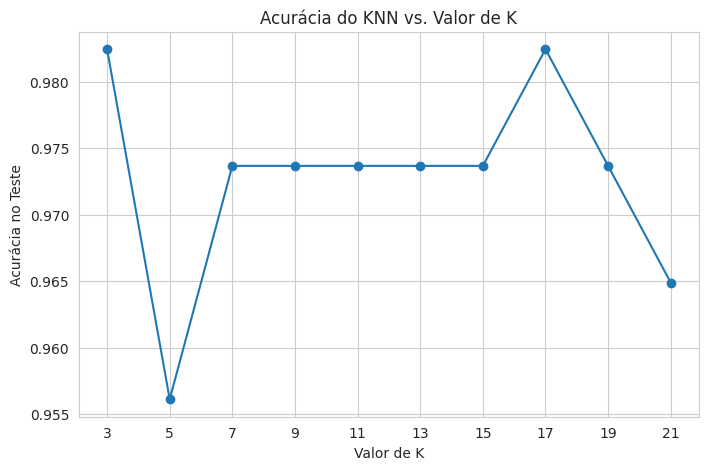


Melhor K encontrado (baseado na acurácia no teste): 3

Relatório de Classificação para KNN com K=3:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



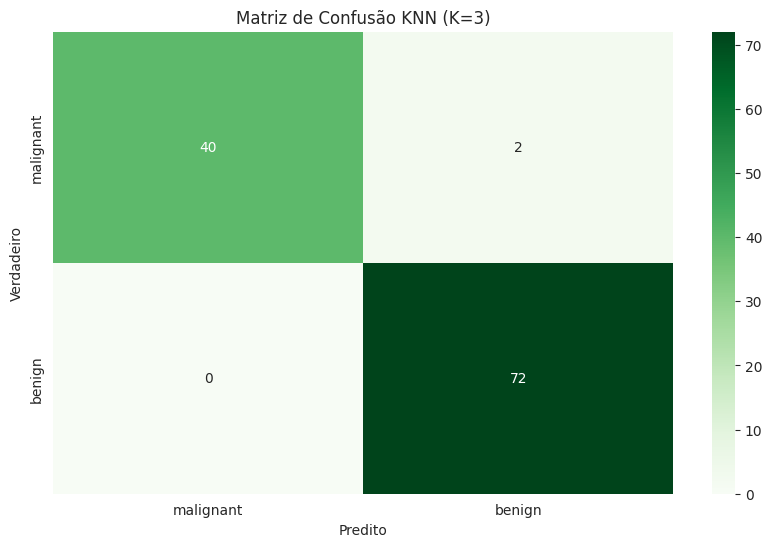

In [ ]:
# Instanciar e treinar o KNeighborsClassifier
# Vamos testar alguns valores de K
k_valores = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
acuracias_knn = []

for k in k_valores:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    acuracias_knn.append(acc_knn)
    print(f"Acurácia do KNN com K={k}: {acc_knn:.4f}")

# Plotar acurácia vs. K
plt.figure(figsize=(8,5))
plt.plot(k_valores, acuracias_knn, marker='o', linestyle='-')
plt.title('Acurácia do KNN vs. Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia no Teste')
plt.xticks(k_valores)
plt.grid(True)
plt.show()

# Escolher o melhor K (ou um bom K) e mostrar o relatório completo
melhor_k_idx = np.argmax(acuracias_knn)
melhor_k = k_valores[melhor_k_idx]
print(f"\nMelhor K encontrado (baseado na acurácia no teste): {melhor_k}")

knn_final = KNeighborsClassifier(n_neighbors=melhor_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_knn_final = knn_final.predict(X_test_scaled)

print(f"\nRelatório de Classificação para KNN com K={melhor_k}:")
print(classification_report(y_test, y_pred_knn_final, target_names=cancer.target_names))

cm_knn = confusion_matrix(y_test, y_pred_knn_final)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title(f'Matriz de Confusão KNN (K={melhor_k})')
plt.show()

# (Opcional) Usar validação cruzada para uma escolha mais robusta de K
# k_range = range(1, 21)
# cv_scores = []
# for k_cv in k_range:
#     knn_cv = KNeighborsClassifier(n_neighbors=k_cv)
#     scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
#     cv_scores.append(scores.mean())
# plt.plot(k_range, cv_scores)
# plt.xlabel('Valor de K para KNN')
# plt.ylabel('Acurácia na Validação Cruzada')
# plt.show()

**Discussão sobre KNN:**
- A escolha de K é crucial.
- A normalização/padronização dos dados é muito importante devido ao cálculo de distâncias.
- Pode ser computacionalmente caro na fase de predição para datasets grandes, pois precisa calcular distâncias para todos os pontos de treinamento.

## 4. Naive Bayes

Naive Bayes é um classificador probabilístico baseado no Teorema de Bayes com a suposição "ingênua" (naive) de independência condicional entre os atributos, dada a classe.

Relatório de Classificação para Gaussian Naive Bayes:
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



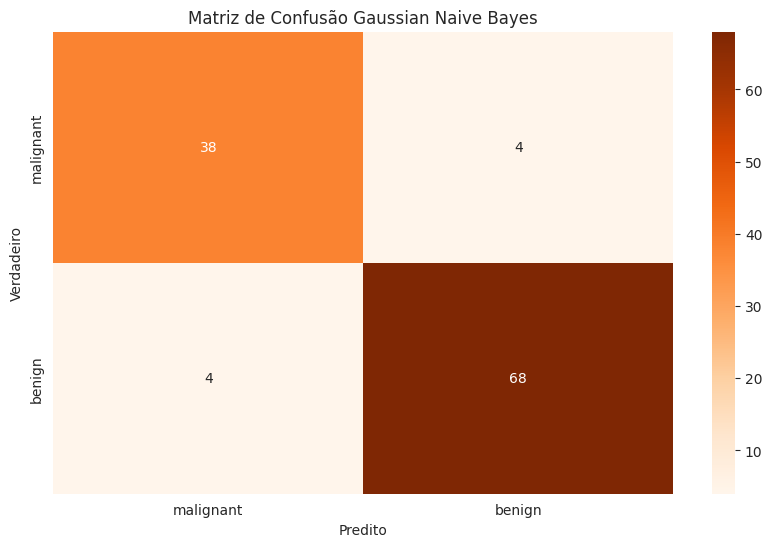

In [ ]:
# Gaussian Naive Bayes (GNB) é adequado para atributos contínuos que se assume seguirem uma distribuição Gaussiana.
# Para GNB, a padronização não é estritamente necessária como no KNN, mas pode ajudar se os atributos tiverem ordens de magnitude muito diferentes.
# Vamos usar os dados escalados por consistência, mas você pode testar com os não escalados também.

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train) # Pode usar X_train também
y_pred_gnb = gnb.predict(X_test_scaled) # Pode usar X_test também

print("Relatório de Classificação para Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb, target_names=cancer.target_names))

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Oranges', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão Gaussian Naive Bayes')
plt.show()

# (Opcional) Observar as médias e variâncias aprendidas pelo GNB
# print(f"Médias aprendidas por classe/atributo (theta_):\n{gnb.theta_}")
# print(f"Variâncias aprendidas por classe/atributo (var_):\n{gnb.var_}")

**Discussão sobre Naive Bayes:**
- Rápido de treinar e classificar.
- Funciona bem mesmo que a suposição de independência seja violada (especialmente para classificação, menos para estimativa de probabilidades).
- Bom desempenho em problemas de alta dimensionalidade (ex: classificação de texto com MultinomialNB ou BernoulliNB).

## 5. Comparação e Discussão dos Modelos

- Comparar as métricas (acurácia, precisão, recall, F1) dos modelos KNN e Naive Bayes no mesmo dataset.
- Discutir as características de cada algoritmo que podem ter levado às diferenças de desempenho.
- Analisar as matrizes de confusão para entender os tipos de erros que cada modelo comete.

--- Resultados Finais ---
KNN (K=3) Acurácia: 0.9825
Gaussian Naive Bayes Acurácia: 0.9298


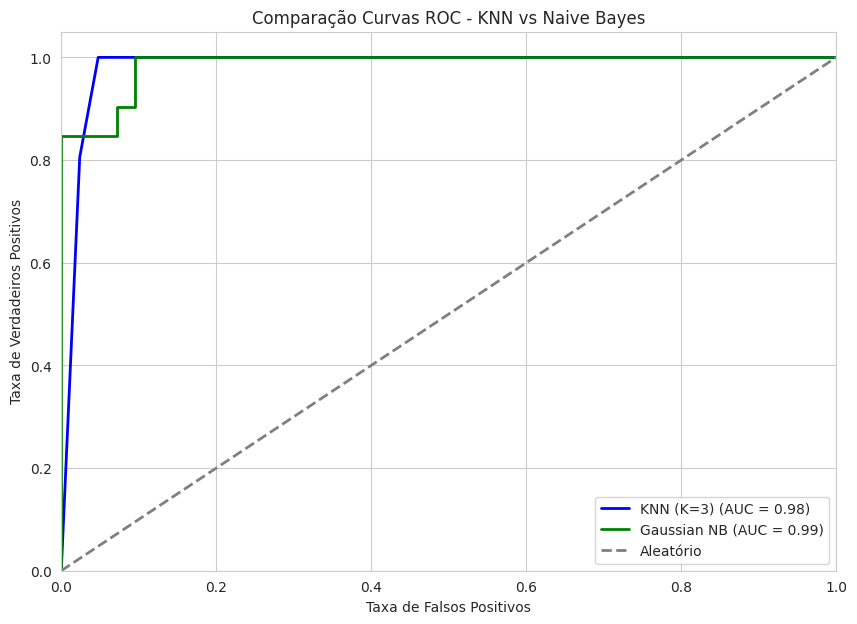

In [ ]:
print(f"--- Resultados Finais ---")
print(f"KNN (K={melhor_k}) Acurácia: {accuracy_score(y_test, y_pred_knn_final):.4f}")
print(f"Gaussian Naive Bayes Acurácia: {accuracy_score(y_test, y_pred_gnb):.4f}")

# Plotar Curvas ROC para ambos os modelos no mesmo gráfico
y_proba_knn_final = knn_final.predict_proba(X_test_scaled)[:, 1]
y_proba_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn_final)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

plt.figure(figsize=(10, 7))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (K={melhor_k}) (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'Gaussian NB (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Comparação Curvas ROC - KNN vs Naive Bayes')
plt.legend(loc="lower right")
plt.show()